In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import os

In [2]:
for dirname, _, filenames in os.walk('data/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

data/brazilian_sell.csv
data/model_data.feather
data/olist_customers_dataset.csv
data/olist_geolocation_dataset.csv
data/olist_orders_dataset.csv
data/olist_order_items_dataset.csv
data/olist_order_payments_dataset.csv
data/olist_order_reviews_dataset.csv
data/olist_products_dataset.csv
data/olist_sellers_dataset.csv
data/product_category_name_translation.csv
data/text_data_english.txt


### Data Source:
Kaggle Links:\
https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce?select=olist_customers_dataset.csv

https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce?select=olist_geolocation_dataset.csv

https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce?select=olist_order_items_dataset.csv

https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce?select=olist_order_payments_dataset.csv

https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce?select=olist_order_reviews_dataset.csv

https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce?select=olist_orders_dataset.csv

https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce?select=olist_products_dataset.csv

https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce?select=olist_sellers_dataset.csv

https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce?select=product_category_name_translation.csv

In [3]:
customers_df = pd.read_csv("data/olist_customers_dataset.csv")
sellers_df = pd.read_csv("data/olist_sellers_dataset.csv")
orderreviews_df = pd.read_csv("data/olist_order_reviews_dataset.csv")
orderitems_df = pd.read_csv("data/olist_order_items_dataset.csv")
products_df = pd.read_csv("data/olist_products_dataset.csv")
geolocations_df = pd.read_csv("data/olist_geolocation_dataset.csv")
categoryname_df = pd.read_csv("data/product_category_name_translation.csv")
orders_df = pd.read_csv("data/olist_orders_dataset.csv")
payments_df = pd.read_csv("data/olist_order_payments_dataset.csv")

## Explored Data Analysis

### customers

In [4]:
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [5]:
customers_df.shape

(99441, 5)

In [6]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [7]:
len(customers_df.customer_state.unique())

27

In [8]:
len(customers_df.customer_city.unique())

4119

In [9]:
len(customers_df.customer_unique_id.unique())

96096

In [10]:
len(customers_df.customer_id.unique())

99441

<Axes: >

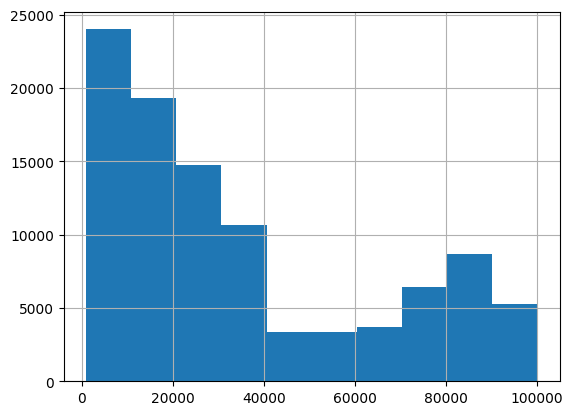

In [11]:
# plot a histogram of the customer_zip_code_prefix column to see its distribution
customers_df['customer_zip_code_prefix'].hist()

<Axes: xlabel='customer_state'>

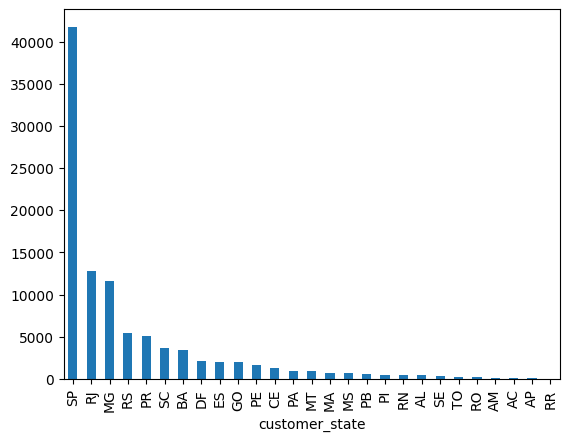

In [12]:
# create a bar chart of the number of customers by their state
customers_df['customer_state'].value_counts().plot(kind='bar')

### sellers

In [13]:
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [14]:
sellers_df.shape

(3095, 4)

In [15]:
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [16]:
len(sellers_df.seller_state.unique())

23

In [17]:
len(sellers_df.seller_city.unique())

611

<Axes: xlabel='seller_state'>

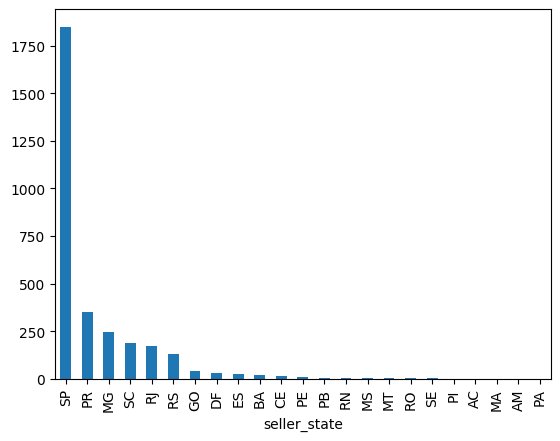

In [18]:
# create a bar chart of the number of sellers by their state
sellers_df['seller_state'].value_counts().plot(kind='bar')

### order reviews

In [19]:
orderreviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [20]:
orderreviews_df.shape

(99224, 7)

In [21]:
orderreviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


array([[<Axes: title={'center': 'review_score'}>]], dtype=object)

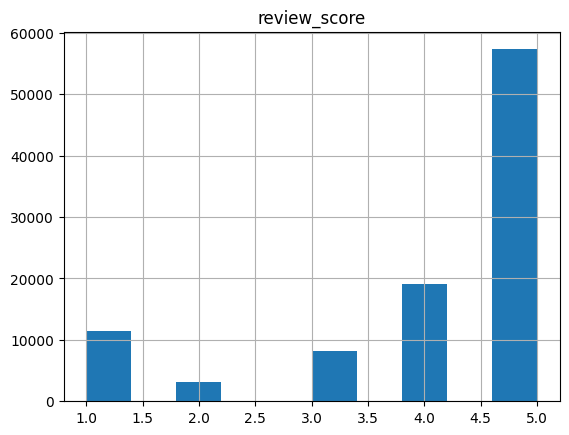

In [22]:
# plot a histogram of review scores
orderreviews_df.hist(column='review_score')

In [23]:
# convert the review_creation_date column to a datetime format
review_date = orderreviews_df[['review_creation_date', 'review_score']].copy()
review_date['review_creation_date'] = pd.to_datetime(orderreviews_df['review_creation_date']).dt.date
review_date = review_date.groupby('review_creation_date').size().reset_index(name='review_count')
review_date

,review_creation_date,review_count
0,2016-10-02,1
1,2016-10-06,1
2,2016-10-09,1
3,2016-10-15,2
4,2016-10-16,1
...,...,...
631,2018-08-27,7
632,2018-08-28,452
633,2018-08-29,390
634,2018-08-30,375


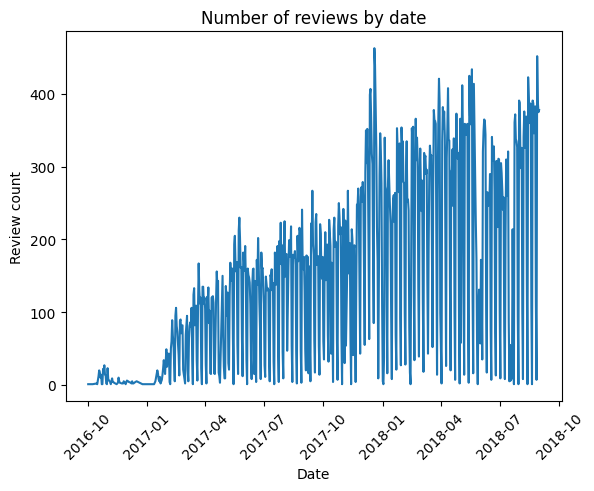

In [24]:
# plot the number of reviews per date
plt.plot(review_date['review_creation_date'], review_date['review_count'])

# set plot title and axes labels
plt.title('Number of reviews by date')
plt.xlabel('Date')
plt.ylabel('Review count')

# rotate date labels on x-axis to avoid overlap
plt.xticks(rotation=45)

# display the plot
plt.show()

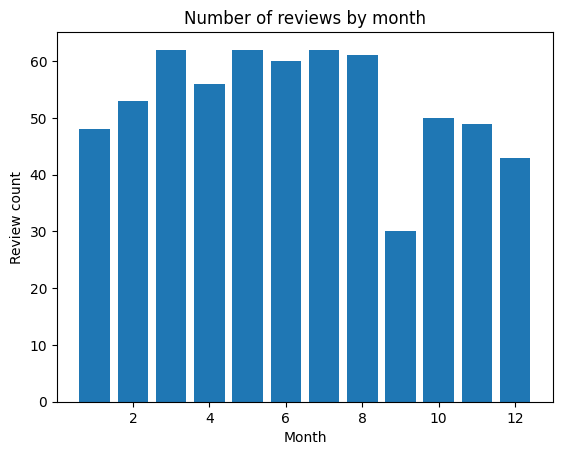

In [25]:
# convert the review_creation_date column to a datetime format
review_date['review_creation_month'] = pd.to_datetime(review_date['review_creation_date']).dt.month

# Group the reviews by the review_creation_date column and count the number of reviews on each date
review_month = review_date.groupby('review_creation_month').size().reset_index(name='review_count')

# plot the review count for each month in a bar chart
plt.bar(review_month['review_creation_month'], review_month['review_count'])

# set plot title and axes labels
plt.title('Number of reviews by month')
plt.xlabel('Month')
plt.ylabel('Review count')

# display the plot
plt.show()

In [26]:
orderreviews_df.review_comment_title.unique()

array([nan, 'recomendo', 'Super recomendo', ...,
       'Não foi entregue o pedido', 'OTIMA EMBALAGEM', 'Foto enganosa '],
      dtype=object)

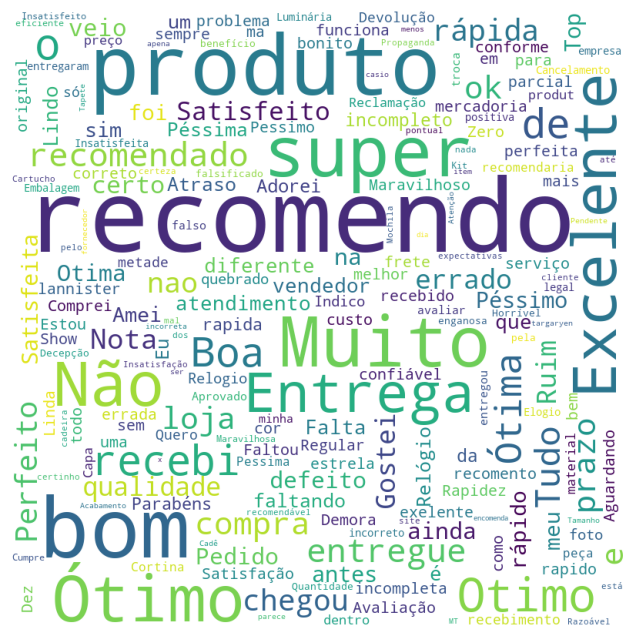

In [27]:
from wordcloud import WordCloud

titles = orderreviews_df['review_comment_title'].dropna()
# create a wordcloud object
wordcloud = WordCloud(width=800, height=800, background_color='white', collocations=False).generate(' '.join(titles))

# plot the wordcloud
plt.figure(figsize=(8, 8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

### order items

In [28]:
orderitems_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [29]:
orderitems_df.shape

(112650, 7)

In [30]:
orderitems_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [31]:
orderitems_df.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


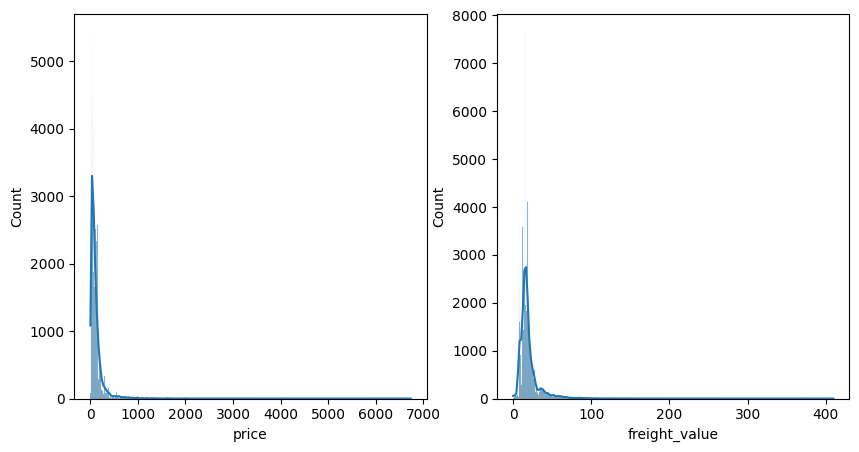

In [32]:
# Visualize distribution of numerical columns
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
sb.histplot(orderitems_df['price'], kde=True, ax=axs[0])
sb.histplot(orderitems_df['freight_value'], kde=True, ax=axs[1])
plt.show()

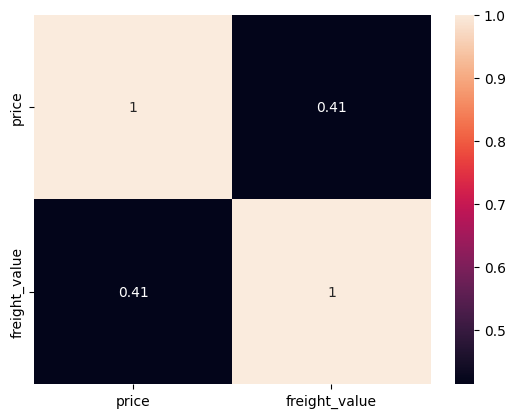

In [33]:
# Visualize correlation matrix of numerical columns
corr = orderitems_df[['price', 'freight_value']].corr()
sb.heatmap(corr, annot=True)
plt.show()

In [34]:
# Group the items by order_id and count the items in each order
order_items = orderitems_df.groupby('order_id')['order_item_id'].count().reset_index(name="item_amount")

order_items_count = order_items.item_amount.value_counts().reset_index(name="count").sort_values("item_amount")
order_items_count

,item_amount,count
0,1,88863
1,2,7516
2,3,1322
3,4,505
4,5,204
5,6,198
6,7,22
7,8,8
11,9,3
8,10,8


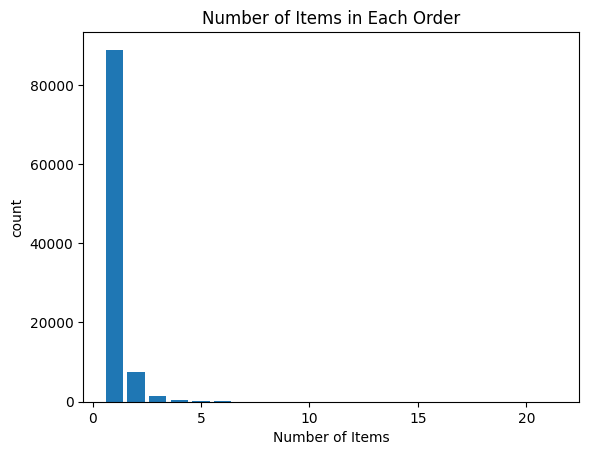

In [35]:
# Plot a bar chart showing the number of items in each order
plt.bar(order_items_count['item_amount'], order_items_count['count'])

# Set the title and axis labels
plt.title('Number of Items in Each Order')
plt.xlabel('Number of Items')
plt.ylabel('count')

# Show the plot
plt.show()

### products

In [36]:
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [37]:
products_df.shape

(32951, 9)

In [38]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [39]:
products_df.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


In [40]:
products_df[products_df.product_weight_g.isnull()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
8578,09ff539a621711667c43eba6a3bd8466,bebes,60.0,865.0,3.0,NaN,NaN,NaN,NaN
18851,5eb564652db742ff8f28759cd8d2652a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
# Replace the NaNs in row 8578 with the mean values
products_df.loc[8578, 'product_weight_g'] = products_df['product_weight_g'].mean().round(1)
products_df.loc[8578, 'product_length_cm'] = products_df['product_length_cm'].mean().round(1)
products_df.loc[8578, 'product_height_cm'] = products_df['product_height_cm'].mean().round(1)
products_df.loc[8578, 'product_width_cm'] = products_df['product_width_cm'].mean().round(1)
products_df.iloc[8578]

product_id                    09ff539a621711667c43eba6a3bd8466
product_category_name                                    bebes
product_name_lenght                                       60.0
product_description_lenght                               865.0
product_photos_qty                                         3.0
product_weight_g                                        2276.5
product_length_cm                                         30.8
product_height_cm                                         16.9
product_width_cm                                          23.2
Name: 8578, dtype: object

In [42]:
products_df[products_df.product_weight_g.isnull()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
18851,5eb564652db742ff8f28759cd8d2652a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
products_df[products_df.product_category_name.isnull()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,NaN,NaN,NaN,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,NaN,NaN,NaN,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,NaN,NaN,NaN,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,NaN,NaN,NaN,NaN,1300.0,45.0,16.0,45.0


In [44]:
# Drop the rows that contain null values
products_df.dropna(inplace=True)

# Reset the index of the DataFrame
products_df.reset_index(drop=True, inplace=True)

In [45]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32341 entries, 0 to 32340
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32341 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32341 non-null  float64
 6   product_length_cm           32341 non-null  float64
 7   product_height_cm           32341 non-null  float64
 8   product_width_cm            32341 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.2+ MB


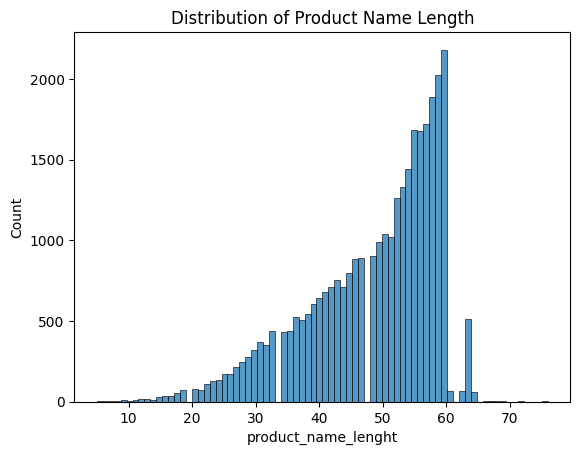

In [46]:
# Visualize the distribution of numerical features
sb.histplot(products_df['product_name_lenght'])
plt.title('Distribution of Product Name Length')
plt.show()

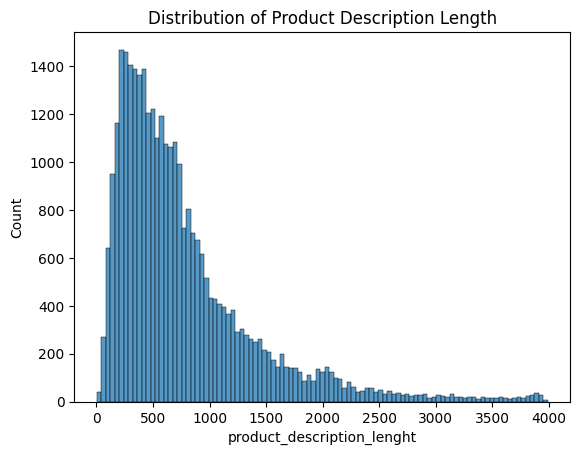

In [47]:
sb.histplot(products_df['product_description_lenght'])
plt.title('Distribution of Product Description Length')
plt.show()

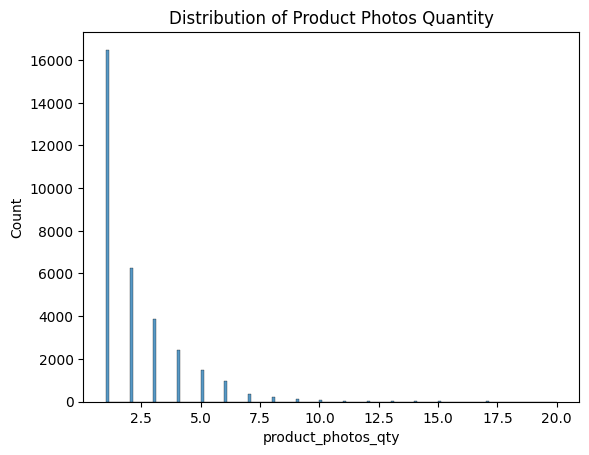

In [48]:
sb.histplot(products_df['product_photos_qty'])
plt.title('Distribution of Product Photos Quantity')
plt.show()

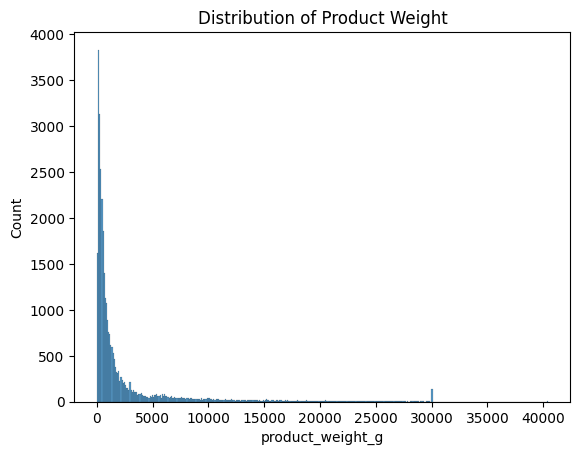

In [49]:
sb.histplot(products_df['product_weight_g'])
plt.title('Distribution of Product Weight')
plt.show()

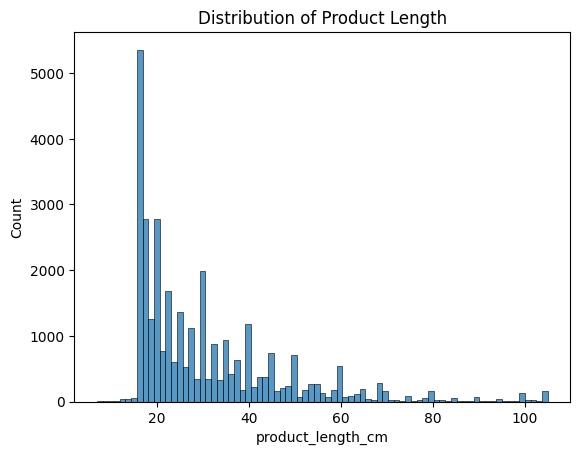

In [50]:
sb.histplot(products_df['product_length_cm'])
plt.title('Distribution of Product Length')
plt.show()

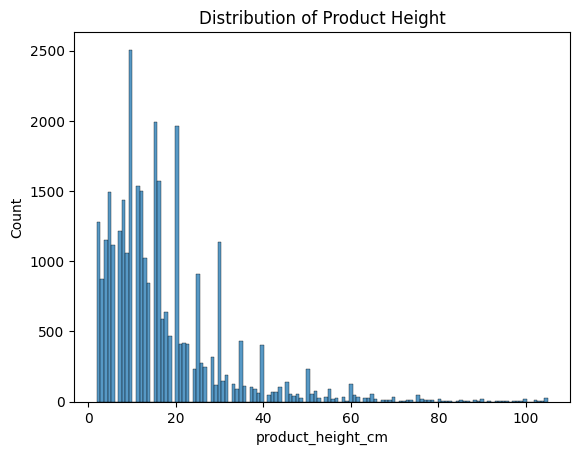

In [51]:
sb.histplot(products_df['product_height_cm'])
plt.title('Distribution of Product Height')
plt.show()

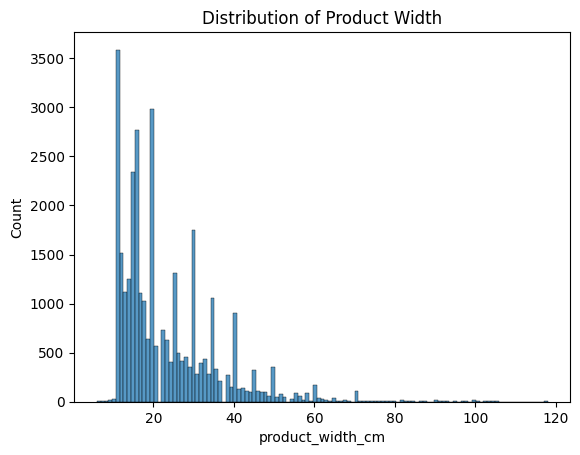

In [52]:
sb.histplot(products_df['product_width_cm'])
plt.title('Distribution of Product Width')
plt.show()

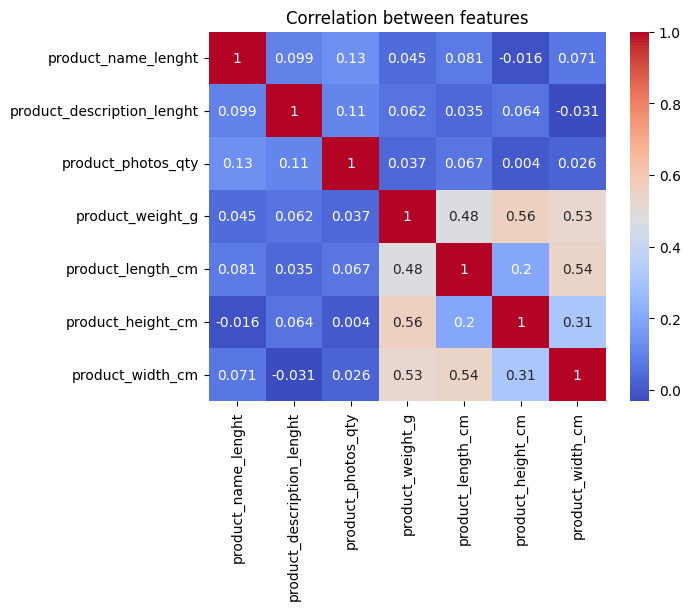

In [53]:
# Analyze the correlation between features
sb.heatmap(products_df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')
plt.title('Correlation between features')
plt.show()

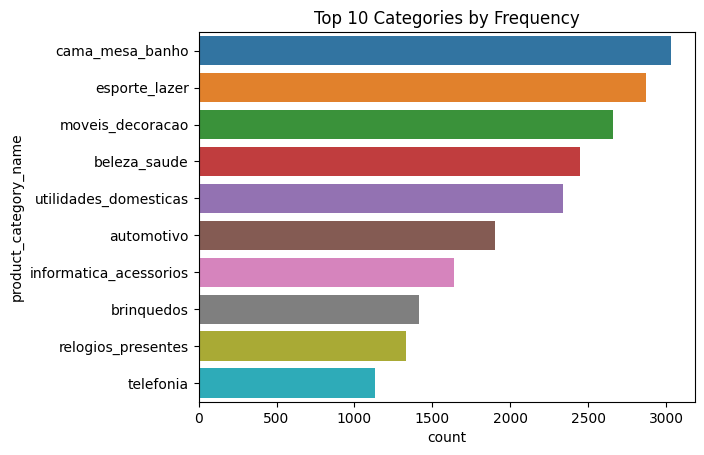

In [54]:
# Explore the distribution and frequency of categorical features
sb.countplot(y=products_df['product_category_name'], order=products_df['product_category_name'].value_counts().index[:10])
plt.title('Top 10 Categories by Frequency')
plt.show()

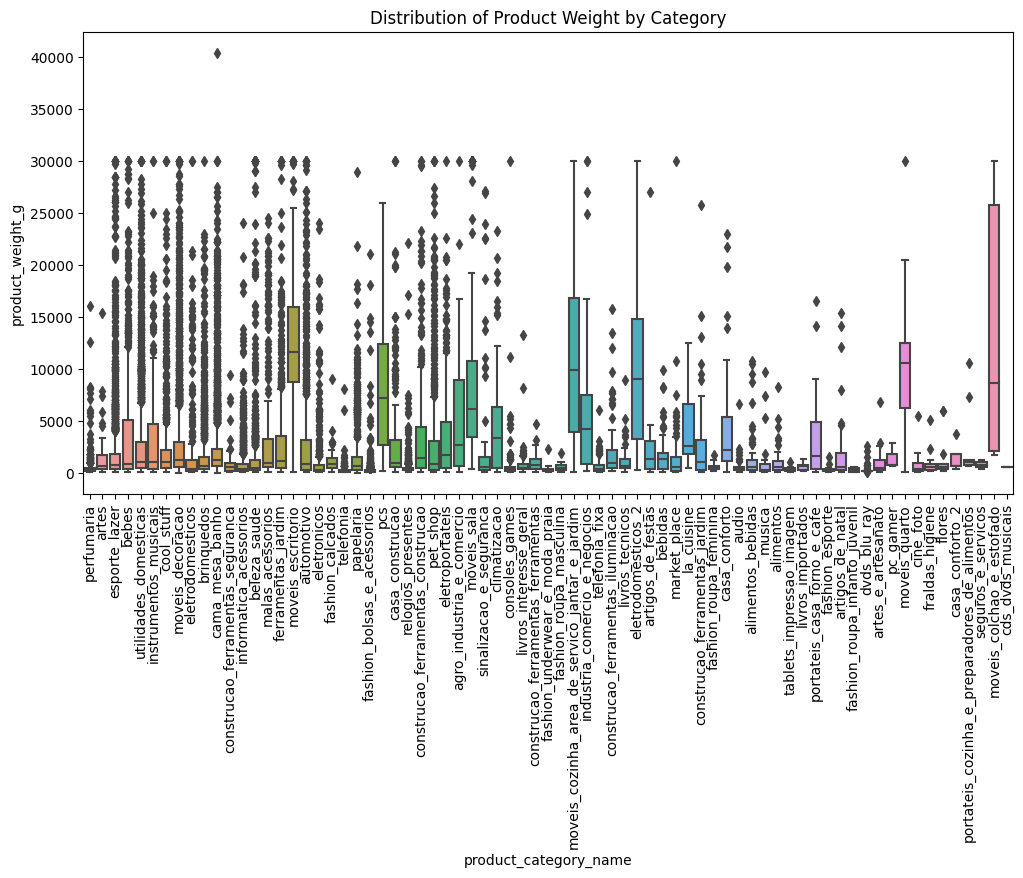

In [55]:
plt.figure(figsize=(12,6))
sb.boxplot(x=products_df['product_category_name'], y=products_df['product_weight_g'])
plt.title('Distribution of Product Weight by Category')
plt.xticks(rotation=90)
plt.show()

### category name

In [56]:
categoryname_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [57]:
categoryname_df.shape

(71, 2)

In [58]:
categoryname_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


### orders 

In [59]:
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [60]:
orders_df.shape

(99441, 8)

In [61]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [62]:
orders_df[orders_df.order_approved_at.isnull() & orders_df.order_delivered_carrier_date.isnull() & orders_df.order_delivered_customer_date.isnull()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
1130,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaN,NaN,NaN,2018-09-12 00:00:00
1801,ed3efbd3a87bea76c2812c66a0b32219,191984a8ba4cbb2145acb4fe35b69664,canceled,2018-09-20 13:54:16,NaN,NaN,NaN,2018-10-17 00:00:00
1868,df8282afe61008dc26c6c31011474d02,aa797b187b5466bc6925aaaa4bb3bed1,canceled,2017-03-04 12:14:30,NaN,NaN,NaN,2017-04-10 00:00:00
2029,8d4c637f1accf7a88a4555f02741e606,b1dd715db389a2077f43174e7a675d07,canceled,2018-08-29 16:27:49,NaN,NaN,NaN,2018-09-13 00:00:00
2161,7a9d4c7f9b068337875b95465330f2fc,7f71ae48074c0cfec9195f88fcbfac55,canceled,2017-05-01 16:12:39,NaN,NaN,NaN,2017-05-30 00:00:00
...,...,...,...,...,...,...,...,...
97696,5a00b4d35edffc56b825c3646a99ba9d,6a3bdf004ca96338fb5fad1b8d93c2e6,canceled,2017-07-02 15:38:46,NaN,NaN,NaN,2017-07-25 00:00:00
98415,227c804e2a44760671a6a5697ea549e4,62e7477e75e542243ee62a0ba73f410f,canceled,2017-09-28 15:02:56,NaN,NaN,NaN,2017-10-16 00:00:00
98909,e49e7ce1471b4693482d40c2bd3ad196,e4e7ab3f449aeb401f0216f86c2104db,canceled,2018-08-07 11:16:28,NaN,NaN,NaN,2018-08-10 00:00:00
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaN,NaN,NaN,2018-10-01 00:00:00


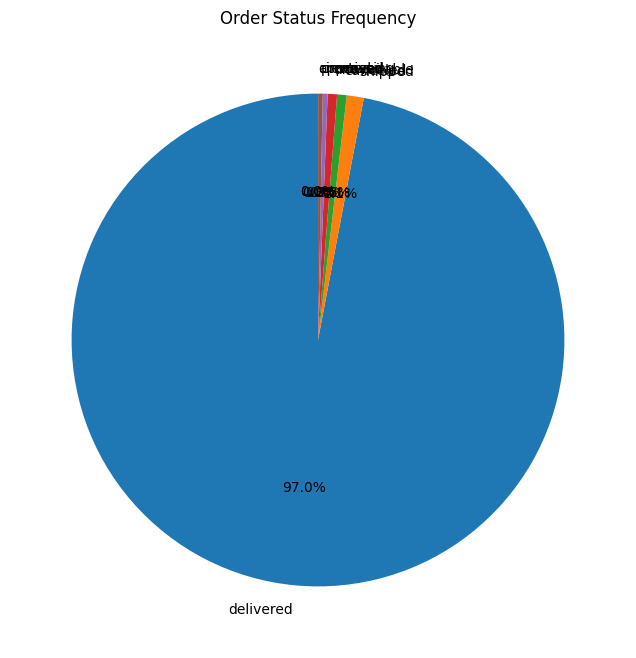

In [63]:
# Count the frequency of order statuses
status_count = orders_df['order_status'].value_counts()

# Plot a pie chart
plt.figure(figsize=(8,8))
plt.pie(status_count, labels=status_count.index, autopct='%1.1f%%', startangle=90)
plt.title('Order Status Frequency')
plt.show()

In [64]:
orders_df.dropna(inplace=True)
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96461 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       96461 non-null  object
 1   customer_id                    96461 non-null  object
 2   order_status                   96461 non-null  object
 3   order_purchase_timestamp       96461 non-null  object
 4   order_approved_at              96461 non-null  object
 5   order_delivered_carrier_date   96461 non-null  object
 6   order_delivered_customer_date  96461 non-null  object
 7   order_estimated_delivery_date  96461 non-null  object
dtypes: object(8)
memory usage: 6.6+ MB


In [65]:
# Convert the date columns to datetime objects
orders_df['order_purchase_timestamp'] = pd.to_datetime(orders_df['order_purchase_timestamp'])
orders_df['order_approved_at'] = pd.to_datetime(orders_df['order_approved_at'])
orders_df['order_delivered_carrier_date'] = pd.to_datetime(orders_df['order_delivered_carrier_date'])
orders_df['order_delivered_customer_date'] = pd.to_datetime(orders_df['order_delivered_customer_date'])
orders_df['order_estimated_delivery_date'] = pd.to_datetime(orders_df['order_estimated_delivery_date'])

# Calculate the time differences between the columns
orders_df['approved_purchase_time'] = orders_df['order_approved_at'] - orders_df['order_purchase_timestamp']
orders_df['carrier_delivery_time'] = orders_df['order_delivered_carrier_date'] - orders_df['order_approved_at']
orders_df['customer_delivery_time'] = orders_df['order_delivered_customer_date'] - orders_df['order_delivered_carrier_date']
orders_df['estimated_delivery_time'] = orders_df['order_estimated_delivery_date'] - orders_df['order_delivered_customer_date']

# Print the average time differences
print('Average time between purchase and approval:', orders_df['approved_purchase_time'].mean())
print('Average time between approval and carrier delivery:', orders_df['carrier_delivery_time'].mean())
print('Average time between carrier delivery and customer delivery:', orders_df['customer_delivery_time'].mean())
print('Average time between customer delivery and estimated delivery:', orders_df['estimated_delivery_time'].mean())

Average time between purchase and approval: 0 days 10:16:39.837893034
Average time between approval and carrier delivery: 2 days 19:10:58.028685168
Average time between carrier delivery and customer delivery: 9 days 07:56:08.719275147
Average time between customer delivery and estimated delivery: 11 days 04:16:01.007909932


### payment

In [66]:
payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [67]:
payments_df.shape

(103886, 5)

In [68]:
payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [69]:
payments_df.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


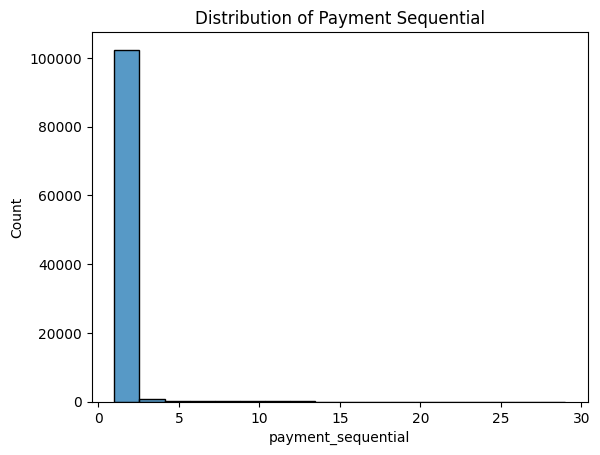

In [70]:
# Visualize the distribution of numerical features
sb.histplot(payments_df['payment_sequential'])
plt.title('Distribution of Payment Sequential')
plt.show()

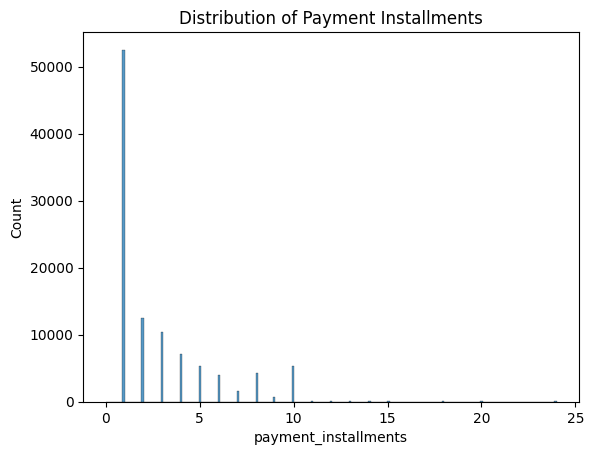

In [71]:
sb.histplot(payments_df['payment_installments'])
plt.title('Distribution of Payment Installments')
plt.show()

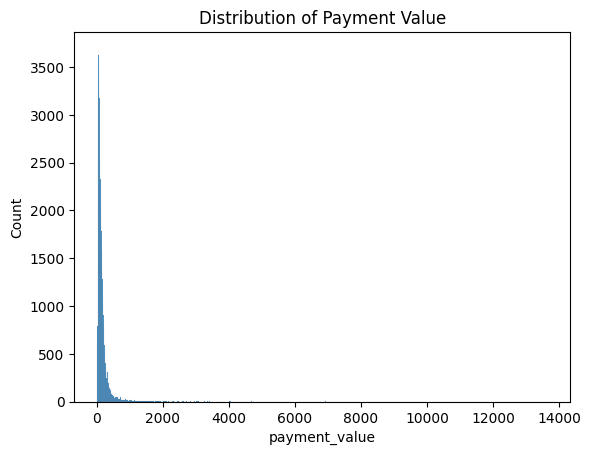

In [72]:
sb.histplot(payments_df['payment_value'])
plt.title('Distribution of Payment Value')
plt.show()

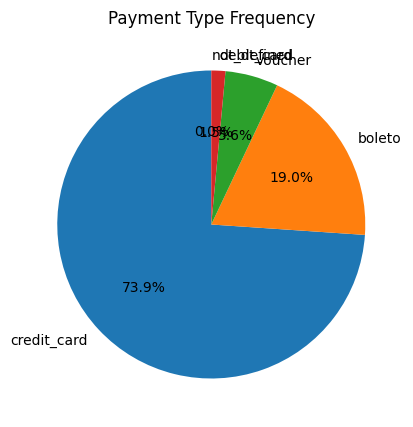

In [73]:
# Count the frequency of payment types
type_count = payments_df['payment_type'].value_counts()

# Plot a pie chart
plt.figure(figsize=(5,5))
plt.pie(type_count, labels=type_count.index, autopct='%1.1f%%', startangle=90)
plt.title('Payment Type Frequency')
plt.show()

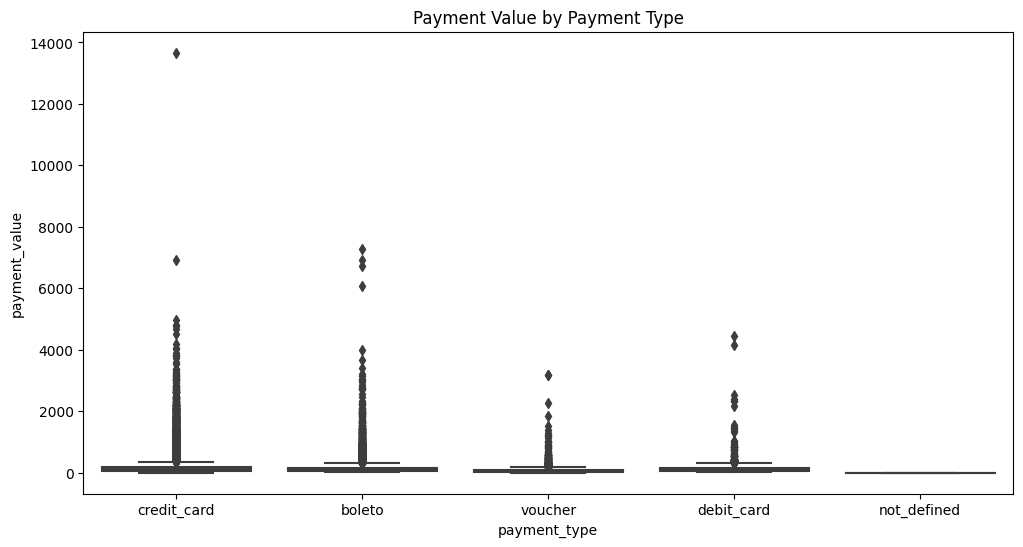

In [74]:
plt.figure(figsize=(12,6))
sb.boxplot(y='payment_value',x='payment_type', data=payments_df)
plt.title('Payment Value by Payment Type')
plt.show()

### Geolocation

In [75]:
geolocations_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [76]:
geolocations_df.shape

(1000163, 5)

In [77]:
geolocations_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


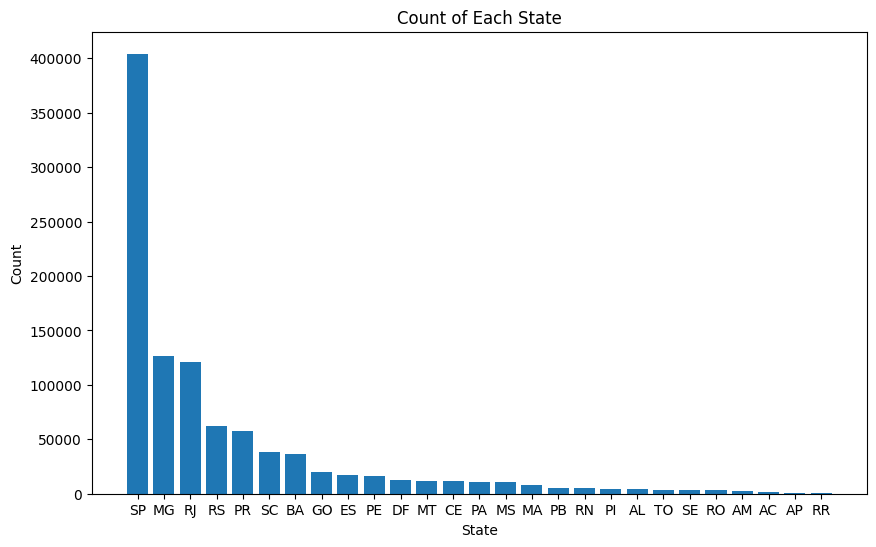

In [78]:
# Plot a bar to visualize the number of records of each state
geo_states = geolocations_df.geolocation_state.value_counts()

plt.figure(figsize=(10,6))
plt.bar(x=geo_states.index, height=geo_states.values)
plt.title('Count of Each State')
plt.xlabel('State')
plt.ylabel('Count')
plt.show()

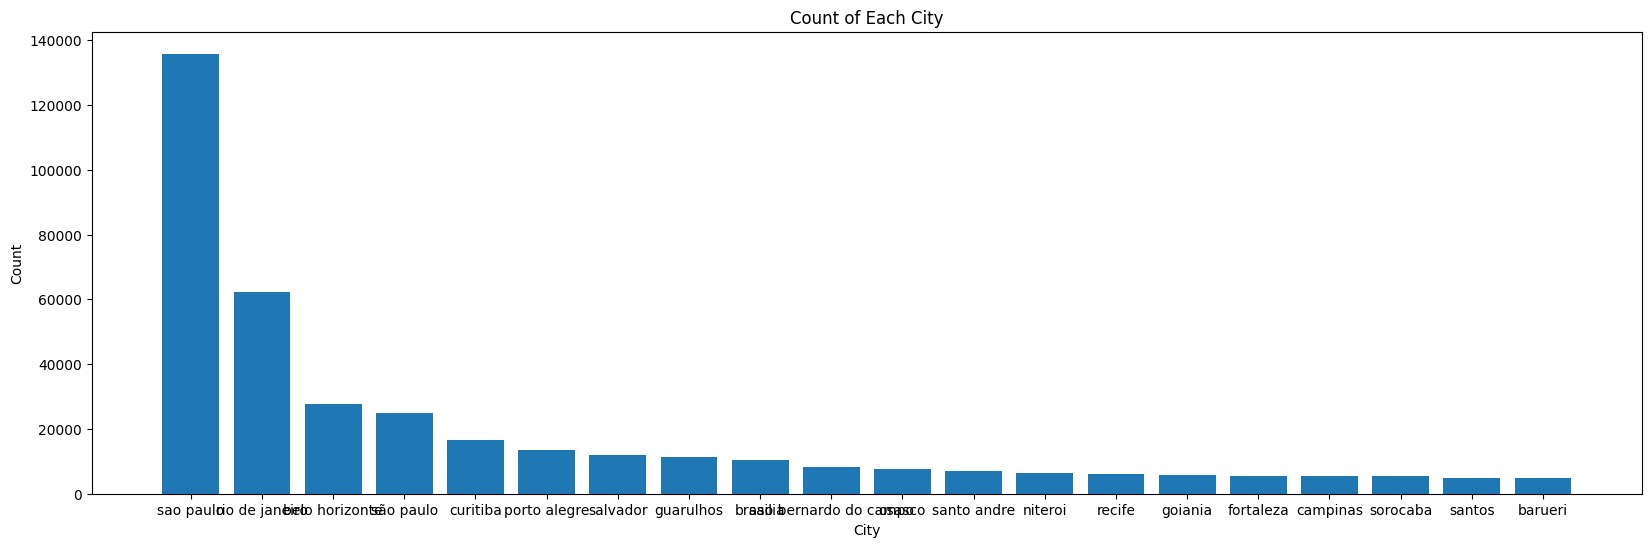

In [79]:
# Plot a bar to visualize the top 20 cities
geo_citys = geolocations_df.geolocation_city.value_counts()

plt.figure(figsize=(20,6))
plt.bar(x=geo_citys.index[:20], height=geo_citys.values[:20])
plt.title('Count of Each City')
plt.xlabel('City')
plt.ylabel('Count')
plt.show()

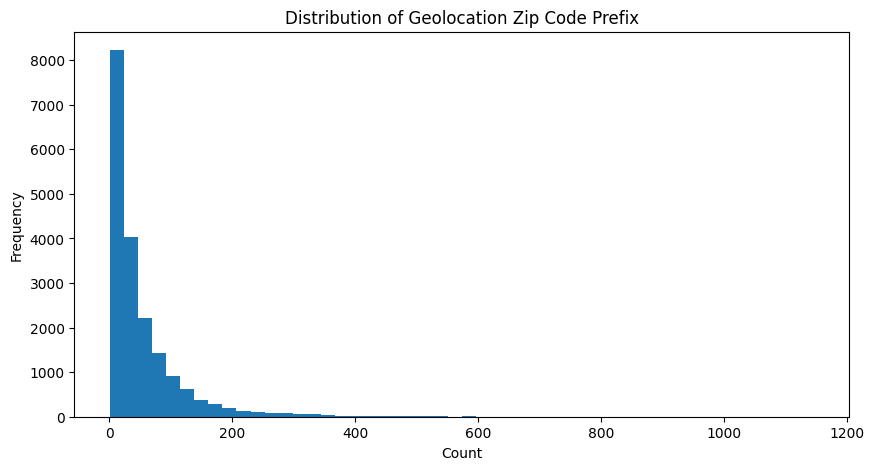

In [80]:
# Visualize the distribution of zip code prefix
prefix_counts = geolocations_df['geolocation_zip_code_prefix'].value_counts()
fig, ax = plt.subplots(figsize=(10, 5))
ax.hist(prefix_counts.values, bins=50)
ax.set_title('Distribution of Geolocation Zip Code Prefix')
ax.set_xlabel('Count')
ax.set_ylabel('Frequency')
plt.show()

In [81]:
import time
import random
import folium
from folium import Marker
from folium.plugins import MarkerCluster

In [82]:
# Group by geolocation latitude and longitude, and count the number of occurrences
state_counts = geolocations_df.groupby('geolocation_state').size().reset_index(name='count')

geo_states = pd.merge(geolocations_df, state_counts, how='left')[['geolocation_lat', 'geolocation_lng', 'geolocation_state' ,'count']]
geo_states = geo_states.groupby('geolocation_state').first().reset_index()
geo_states

,geolocation_state,geolocation_lat,geolocation_lng,count
0,AC,-23.578707,-46.645779,1301
1,AL,-9.590207,-35.766997,4183
2,AM,-3.098469,-59.999784,2432
3,AP,0.040253,-51.078577,853
4,BA,-12.987172,-38.522682,36045
5,CE,-3.725240,-38.545775,11674
6,DF,-15.790439,-47.880655,12986
7,ES,-20.319586,-40.329319,16748
8,GO,-16.053463,-48.030561,20139
9,MA,-2.524427,-44.290479,7853


In [83]:
# Create a map and add the markers
m = folium.Map(location=[geo_states.iloc[0].geolocation_lat, geo_states.iloc[0].geolocation_lng], zoom_start=4)

# Add markers with different size and color based on count
for i, row in geo_states.iterrows():
    size = row['count'] // 500 + 1
    size = 15 if size > 15 else size
    color = 'red'
    folium.CircleMarker(location=[row['geolocation_lat'], row['geolocation_lng']], 
                        radius=size, color=color, fill=True, fill_color=color, fill_opacity=0.6).add_to(m)

# Add a title to the map
title_html = '<h3 align="center" style="font-size:20px"><b>Geolocation Map</b></h3>'
m.get_root().html.add_child(folium.Element(title_html))
m

In [84]:
# Get the dataframe for the customer locations
# Make representative point data from zip code of geo_data
geo_locations = pd.DataFrame(dict(rep_lat=geolocations_df.groupby("geolocation_zip_code_prefix").geolocation_lat.mean(),
                                rep_long=geolocations_df.groupby("geolocation_zip_code_prefix").geolocation_lng.mean())).reset_index()

# Merge geo_rep_data_on customer data
geo_customers = customers_df.merge(geo_locations, left_on="customer_zip_code_prefix", right_on="geolocation_zip_code_prefix")
geo_customers

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_zip_code_prefix,rep_lat,rep_long
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,14409,-20.498489,-47.396929
1,5dca924cc99eea2dc5ba40d11ec5dd0f,2761fee7f378f0a8d7682d8a3fa07ab1,14409,franca,SP,14409,-20.498489,-47.396929
2,661897d4968f1b59bfff74c7eb2eb4fc,d06a495406b79cb8203ea21cc0942f8c,14409,franca,SP,14409,-20.498489,-47.396929
3,702b62324327ccba20f1be3465426437,8b3d988f330c1d1c3332ccd440c147b7,14409,franca,SP,14409,-20.498489,-47.396929
4,bdf997bae7ca819b0415f5174d6b4302,866755e25db620f8d7e81b351a15bb2f,14409,franca,SP,14409,-20.498489,-47.396929
...,...,...,...,...,...,...,...,...
99158,0b7a30ba373aeb55cf28add5b5477956,8c8173e547e020f411aa55b2fceed861,87145,paicandu,PR,87145,-23.501806,-52.150926
99159,ff6b440b2465bfaef05c675efb48cd15,e38a27b979a552e019e297ecc22dc67b,98860,eugenio de castro,RS,98860,-28.527590,-54.145960
99160,3f7029d9b98a47370cd5f3a97adcbccd,5894d202cc869b4ec460fce3c6ed8cb5,5538,sao paulo,SP,5538,-23.588483,-46.737908
99161,d9110683c7a282144e9fc97660026a28,5cbfdb85ec130898108b32c50d619c39,74980,aparecida de goiania,GO,74980,-16.822735,-49.248175


In [85]:
# Get the customer oriented dataframe
geo_customers_locations = geo_customers.groupby("customer_unique_id")[["rep_lat", "rep_long"]].mean().reset_index()
geo_customers_locations

,customer_unique_id,rep_lat,rep_long
0,0000366f3b9a7992bf8c76cfdf3221e2,-23.340235,-46.830140
1,0000b849f77a49e4a4ce2b2a4ca5be3f,-23.559115,-46.787626
2,0000f46a3911fa3c0805444483337064,-27.542880,-48.633426
3,0000f6ccb0745a6a4b88665a16c9f078,-1.312214,-48.483159
4,0004aac84e0df4da2b147fca70cf8255,-23.505548,-47.469705
...,...,...,...
95823,fffcf5a5ff07b0908bd4e2dbc735a684,-8.362511,-36.562343
95824,fffea47cd6d3cc0a88bd621562a9d061,-12.217395,-38.959308
95825,ffff371b4d645b6ecea244b27531430a,-11.834552,-55.508110
95826,ffff5962728ec6157033ef9805bacc48,-21.126568,-41.672806


In [86]:
# Plot where the costomers are using folium map and markers
m2 = folium.Map(location=[-15, -55], tiles="cartodbpositron", zoom_start=4)

# Add points which is randomly selected on the map
sample_idx = random.sample(geo_customers_locations.index.to_list(), k=1000)
sample_df = geo_customers_locations.loc[sample_idx]

# Add points on the map
mc = MarkerCluster()
for idx, row in sample_df.iterrows():
    mc.add_child(Marker([row["rep_lat"], row["rep_long"]]))
m2.add_child(mc)

# Add title to the map
title_html = '''<h3 align="center" style="font-size:20px"><b>Customer Location Map</b></h3>'''
m2.get_root().html.add_child(folium.Element(title_html))
display(m2)

## Combined

In [87]:
BrazilianSell = pd.merge(orderitems_df, orders_df[['order_id', 'customer_id', 'order_purchase_timestamp', 'order_delivered_customer_date']], how='left')
BrazilianSell = pd.merge(BrazilianSell, payments_df[['order_id', 'payment_type', 'payment_installments', 'payment_value']], how='left')
BrazilianSell = pd.merge(BrazilianSell, sellers_df[['seller_id', 'seller_city', 'seller_state']], how='left')
BrazilianSell = pd.merge(BrazilianSell, orderreviews_df[['order_id', 'review_score']], how='left')
products_df = pd.merge(products_df, categoryname_df, how='left')
BrazilianSell = pd.merge(BrazilianSell, products_df[['product_id', 'product_category_name_english']], how='left')
BrazilianSell = pd.merge(BrazilianSell, customers_df[['customer_id', 'customer_unique_id', 'customer_city', 'customer_state']], how='left')
BrazilianSell

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_purchase_timestamp,order_delivered_customer_date,payment_type,payment_installments,payment_value,seller_city,seller_state,review_score,product_category_name_english,customer_unique_id,customer_city,customer_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,2017-09-13 08:59:02,2017-09-20 23:43:48,credit_card,2.0,72.19,volta redonda,SP,5.0,cool_stuff,871766c5855e863f6eccc05f988b23cb,campos dos goytacazes,RJ
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,2017-04-26 10:53:06,2017-05-12 16:04:24,credit_card,3.0,259.83,sao paulo,SP,4.0,pet_shop,eb28e67c4c0b83846050ddfb8a35d051,santa fe do sul,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,2018-01-14 14:33:31,2018-01-22 13:19:16,credit_card,5.0,216.87,borda da mata,MG,5.0,furniture_decor,3818d81c6709e39d06b2738a8d3a2474,para de minas,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,2018-08-08 10:00:35,2018-08-14 13:32:39,credit_card,2.0,25.78,franca,SP,4.0,perfumery,af861d436cfc08b2c2ddefd0ba074622,atibaia,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,2017-02-04 13:57:51,2017-03-01 16:42:31,credit_card,3.0,218.04,loanda,PR,5.0,garden_tools,64b576fb70d441e8f1b2d7d446e483c5,varzea paulista,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118305,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,b51593916b4b8e0d6f66f2ae24f2673d,2018-04-23 13:57:06,2018-05-10 22:56:40,boleto,1.0,343.40,itajai,SC,5.0,housewares,0c9aeda10a71f369396d0c04dce13a64,sao luis,MA
118306,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,84c5d4fbaf120aae381fad077416eaa0,2018-07-14 10:26:46,2018-07-23 20:31:55,boleto,1.0,386.53,sao paulo,SP,5.0,computers_accessories,0da9fe112eae0c74d3ba1fe16de0988b,curitiba,PR
118307,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,29309aa813182aaddc9b259e31b870e6,2017-10-23 17:07:56,2017-10-28 12:22:22,credit_card,3.0,116.85,curitiba,PR,5.0,sports_leisure,cd79b407828f02fdbba457111c38e4c4,sao paulo,SP
118308,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,b5e6afd5a41800fdf401e0272ca74655,2017-08-14 23:02:59,2017-08-16 21:59:40,credit_card,3.0,64.71,sao paulo,SP,5.0,computers_accessories,eb803377c9315b564bdedad672039306,vinhedo,SP


In [88]:
BrazilianSell['order_id'], _ = pd.factorize(BrazilianSell['order_id'])
BrazilianSell['product_id'], _ = pd.factorize(BrazilianSell['product_id'])
BrazilianSell['seller_id'], _ = pd.factorize(BrazilianSell['seller_id'])
BrazilianSell['customer_id'], _ = pd.factorize(BrazilianSell['customer_id'])
BrazilianSell['customer_unique_id'], _ = pd.factorize(BrazilianSell['customer_unique_id'])
BrazilianSell

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_purchase_timestamp,order_delivered_customer_date,payment_type,payment_installments,payment_value,seller_city,seller_state,review_score,product_category_name_english,customer_unique_id,customer_city,customer_state
0,0,1,0,0,2017-09-19 09:45:35,58.90,13.29,0,2017-09-13 08:59:02,2017-09-20 23:43:48,credit_card,2.0,72.19,volta redonda,SP,5.0,cool_stuff,0,campos dos goytacazes,RJ
1,1,1,1,1,2017-05-03 11:05:13,239.90,19.93,1,2017-04-26 10:53:06,2017-05-12 16:04:24,credit_card,3.0,259.83,sao paulo,SP,4.0,pet_shop,1,santa fe do sul,SP
2,2,1,2,2,2018-01-18 14:48:30,199.00,17.87,2,2018-01-14 14:33:31,2018-01-22 13:19:16,credit_card,5.0,216.87,borda da mata,MG,5.0,furniture_decor,2,para de minas,MG
3,3,1,3,3,2018-08-15 10:10:18,12.99,12.79,3,2018-08-08 10:00:35,2018-08-14 13:32:39,credit_card,2.0,25.78,franca,SP,4.0,perfumery,3,atibaia,SP
4,4,1,4,4,2017-02-13 13:57:51,199.90,18.14,4,2017-02-04 13:57:51,2017-03-01 16:42:31,credit_card,3.0,218.04,loanda,PR,5.0,garden_tools,4,varzea paulista,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118305,98661,1,1727,741,2018-05-02 04:11:01,299.99,43.41,96456,2018-04-23 13:57:06,2018-05-10 22:56:40,boleto,1.0,343.40,itajai,SC,5.0,housewares,93337,sao luis,MA
118306,98662,1,27137,1580,2018-07-20 04:31:48,350.00,36.53,96457,2018-07-14 10:26:46,2018-07-23 20:31:55,boleto,1.0,386.53,sao paulo,SP,5.0,computers_accessories,93338,curitiba,PR
118307,98663,1,13742,48,2017-10-30 17:14:25,99.90,16.95,96458,2017-10-23 17:07:56,2017-10-28 12:22:22,credit_card,3.0,116.85,curitiba,PR,5.0,sports_leisure,93339,sao paulo,SP
118308,98664,1,10334,912,2017-08-21 00:04:32,55.99,8.72,96459,2017-08-14 23:02:59,2017-08-16 21:59:40,credit_card,3.0,64.71,sao paulo,SP,5.0,computers_accessories,93340,vinhedo,SP


In [89]:
BrazilianSell.dropna(inplace=True)
BrazilianSell.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113194 entries, 0 to 118309
Data columns (total 20 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       113194 non-null  int64         
 1   order_item_id                  113194 non-null  int64         
 2   product_id                     113194 non-null  int64         
 3   seller_id                      113194 non-null  int64         
 4   shipping_limit_date            113194 non-null  object        
 5   price                          113194 non-null  float64       
 6   freight_value                  113194 non-null  float64       
 7   customer_id                    113194 non-null  int64         
 8   order_purchase_timestamp       113194 non-null  datetime64[ns]
 9   order_delivered_customer_date  113194 non-null  datetime64[ns]
 10  payment_type                   113194 non-null  object        
 11  payme

In [90]:
# BrazilianSell.to_csv('data/brazilian_sell.csv')